In [2]:
import numpy as np
from cost_functions import V_a, gradV_a, V_b, gradV_b, V_c, gradV_c, V_1, V_2, V_3
import matplotlib.pyplot as plt
from utils import visualize_optimization
from algorithms import secant, conjugate_gradient, steepest_descent

Text(0.5, 0.92, 'Cost Function B')

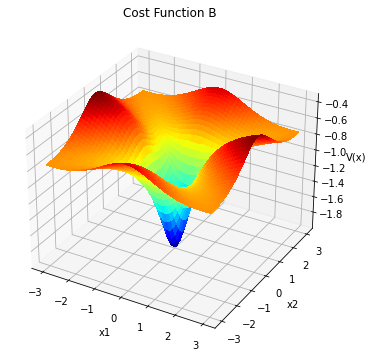

In [2]:
x = np.linspace(-3, 3)
y = np.linspace(-3, 3)
xg, yg = np.meshgrid(x, y)

X = np.array([xg,yg])
z = V_b(X)

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, z,rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V(x)')
ax.set_title('Cost Function B')

In [7]:
def V_c_VIS(x):
    if x.shape[0] != 2:
        raise ValueError('X must have dimension 2.')
    x, y = x[0], x[1]
    return 1 + x+2*y + 0.5*(12*x**2+6*x*y+10*y**2)+10*np.log(1+x**4)*np.sin(100*x)+10*np.log(1+y**4)*np.cos(100*y)

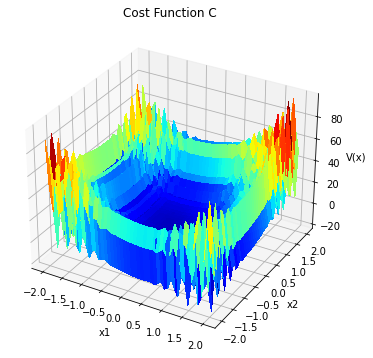

In [9]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
xg, yg = np.meshgrid(x, y)

X = np.array([xg,yg])
z = V_c_VIS(X)

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, z,rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V(x)')
ax.set_title('Cost Function C')
plt.show()

Text(0.5, 0.92, 'Cost Function 3')

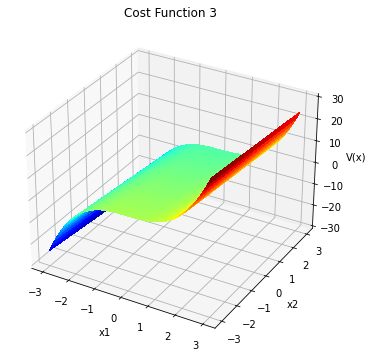

In [6]:
x = np.linspace(-3, 3)
y = np.linspace(-3, 3)
xg, yg = np.meshgrid(x, y)

X = np.array([xg,yg])
z = V_3(X)

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, z,rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V(x)')
ax.set_title('Cost Function 3')

In [ ]:
from scipy.optimize import minimize

x0 = np.array([[0], [0]])

a = minimize(V_c, x0)
x = a.x
minimum = V_c(a.x)
i = a.nit
x


In [44]:
x0 = np.array([[0], [0]])
x, minimum, x_hist, v_hist =  steepest_descent(x0,
                                V_c,
                                gradV_c,
                                step_size ='armijo',
                                threshold = 1e-6, 
                                log = False, 
                                h = 1e-8, 
                                max_iter = 1e3, 
                                fd_method = 'central', 
                                track_history = True)
                                
print(f'{x[0].item():.5f}\t{x[1].item():.5f} \t{minimum:.5f}')


x_hist = np.array(x_hist)
x1_hist = x_hist[:, 0]
x2_hist = x_hist[:, 1]


1.61796	-2.67034 	-24.41544


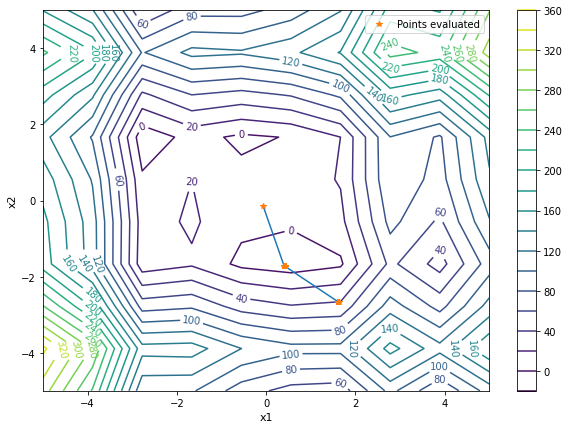

In [45]:
x1 = np.linspace(-5, 5, 10)
x2 = np.linspace(-5, 5, 10)
x = np.meshgrid(x1,x2)
x = np.array(x)
Z = V_c_VIS(x)


fig = plt.figure(figsize = (10,7))
contours = plt.contour(x1, x2, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
# plt.title(f"Evolution of {algorithm_name} optimization of cost function {cost_func_name}", fontsize=12)
plt.plot(x1_hist, x2_hist)
plt.plot(x1_hist, x2_hist, '*', label = "Points evaluated")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

In [47]:
v = np.array([[1.61796],	[-2.67034]])
V_c_VIS(v)

array([-24.41543798])